In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# функция нормализации
def normalization(eta):
    eta_A, eta_E = eta[0], eta[-1]
    eta_star = (eta - eta_A)/(eta_E - eta_A)
    return eta_star
# функция денормализации
def denormalization(eta_star, eta_A, eta_E):
    return eta_star * (eta_E - eta_A) + eta_A

In [3]:
# функция сжатия
def compress_function(x_star, P = 1, Q = 1e-10):
    return P * x_star + (1 - P) * (1 - np.tanh(Q * (1 - x_star)) / np.tanh(Q))

In [4]:
# функция нижней границы
def f1(x):
    return np.sqrt(x)
# функция верхней границы
def f2(x):
    return 2 + 0.5 * np.sqrt(x)

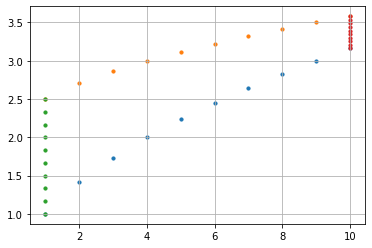

In [5]:
# отрисуем канал
x_l, x_r = 1, 10
M, N = 10, 10
x = np.linspace(x_l, x_r, N)
y1 = f1(x)
y2 = f2(x)
y_l = np.linspace(y1[0], y2[0], M)
y_r = np.linspace(y1[-1], y2[-1], M)

plt.scatter(x, y1, s = 10)
plt.scatter(x, y2, s = 10)
plt.scatter([x[0]] * len(y_l), y_l, s = 10)
plt.scatter([x[-1]] * len(y_r), y_r, s = 10)
plt.grid()

In [12]:
# построим равномерную сетку N на M
N, M = 10, 5
ksi = np.arange(N)
eta = np.arange(M)
ksi_star = normalization(ksi)
eta_star = normalization(eta)
# распределение на левой границе
S_AD = eta_star
# распределение на правой границе
S_BC = eta_star
# распределение между границами
S = S_AD + ksi_star.reshape((N, 1))@(S_BC - S_AD).reshape((1, M))
# распределение на нижней границе
r_AB = ksi_star
x_AB = x_l + (x_r - x_l)*r_AB
y_AB = f1(x_AB)
# распределение на верхней границе
r_DC = ksi_star
x_DC = x_l + (x_r - x_l)*r_DC
y_DC = f2(x_DC)


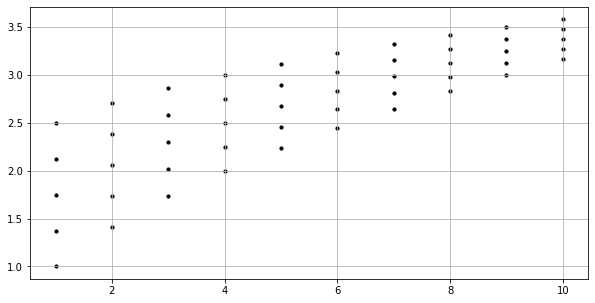

In [15]:
X = (1 - S) * x_AB.reshape((N, 1)) + S * x_DC.reshape((N, 1))
Y = (1 - S) * y_AB.reshape((N, 1)) + S * y_DC.reshape((N, 1))
# нарисуем равномерную сетку
plt.figure(figsize=(10, 5))
plt.scatter(X, Y, c = 'black', s = 10)
plt.grid(True)

In [30]:
# функция сжатия сетки по двум направлениям
# P_x, Q_x - параметры сжатия вдоль оси X
# P_y, Q_y - параметры сжатия вдоль оси Y
def compress_rectangle(N, M, x_l, x_r, P_x, P_y, Q_x, Q_y):
    ksi = np.arange(N)
    eta = np.arange(M)
    ksi_star = normalization(ksi)
    eta_star = normalization(eta)
    # сжимаем боковые границы
    S_AD = compress_function(eta_star, P_y, Q_y)
    S_BC = compress_function(eta_star, P_y, Q_y)
    S = S_AD + ksi_star.reshape((N, 1)) @ (S_BC - S_AD).reshape((1, M))
    # сжимаем нижнюю границу
    r_AB = compress_function(ksi_star, P_x, Q_x)
    x_AB = x_l + (x_r - x_l) * r_AB
    y_AB = f1(x_AB)
    # сжимаем верхнюю границу
    r_DC = compress_function(ksi_star, P_x, Q_x)
    x_DC = x_l + (x_r - x_l) * r_DC
    y_DC = f2(x_DC)

    X = (1 - S) * x_AB.reshape((N, 1)) + S * x_DC.reshape((N, 1)) 
    Y = (1 - S) * y_AB.reshape((N, 1)) + S * y_DC.reshape((N, 1))    
    return X, Y

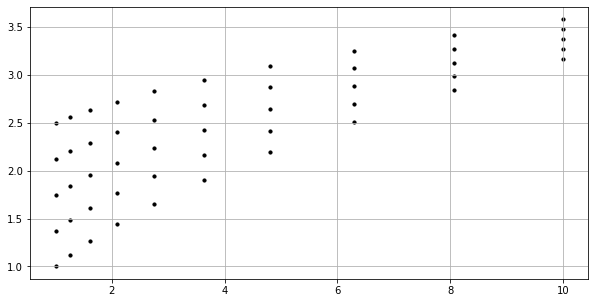

In [40]:
N, M = 10, 5
x_l, x_r = 1, 10
# построим сетку, сжатую к левому краю
X, Y = compress_rectangle(N, M, x_l, x_r, 0.1, 1, 2, 1)
plt.figure(figsize=(10, 5))
plt.scatter(X, Y, c = 'black', s = 10)
plt.grid(True)

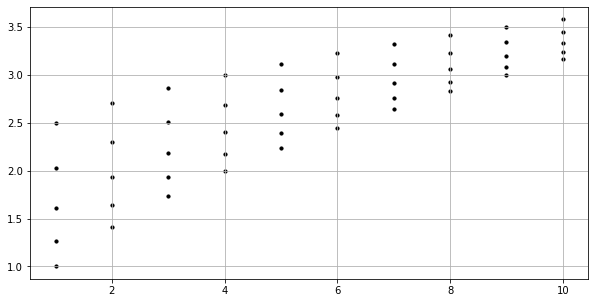

In [41]:
# построим сетку, сжатую к нижнему краю
X, Y = compress_rectangle(N, M, x_l, x_r, 1, 0.1, 1, 1)
plt.figure(figsize=(10, 5))
plt.scatter(X, Y, c = 'black', s = 10)
plt.grid(True)